In [1]:
# Install Libraries
#!pip install textblob
#!pip install tweepy

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 2.6 MB/s eta 0:00:002.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.9/763.9 KB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tweepy-4.8.0-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)


In [17]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# Authentication

#consumerKey = "F2mhn2w2PjFBukxlLNaQ4sAHA"
#consumerSecret = "EuTyZ5rbRPjsBSqBWQGnP1Iu9QfHLil6z2hU6S01OEi2llpQF1"
#accessToken = "Type your accedd token here"
#accessTokenSecret = "Type your access token secret here"

#auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
#auth.set_access_token(accessToken, accessTokenSecret)
#api = tweepy.API(auth)


client = tweepy.Client('AAAAAAAAAAAAAAAAAAAAAEs2awEAAAAAwoP%2FaCpWBy5Y4lFSaF9ipNYnFbk%3DCrZgeZ16oNRZkwGsBtkZ9eWWqSGHx6eLmsqVizBZ7HnuIjO1yp')
#consumer_key = 'jo9AANfY3t7JgFGS844d7TTez'
#consumer_secret = 'UuJkJ5lutybwhDXR5OT0Qi5wVk0XTv4Xb6etXXGggrMnZrsKsM'
#access_token = '1000354024699387904-Vd2NiuN5BpKLbjGGyyGyk8SinF7Pog'
#access_token_secret = 'ZJZwTFyxl1IYjgyOp3SOrd2keVWKgGwwctk5HeoDYLD2M'

#client = tweepy.Client(
#    consumer_key=consumer_key, consumer_secret=consumer_secret,
#    access_token=access_token, access_token_secret=access_token_secret
#)

#api = tweepy.API(auth)

In [19]:
client

In [74]:
#Sentiment Analysis
nltk.download('vader_lexicon')

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

#keyword = input("Please enter keyword or hashtag to search: ")
#noOfTweet = int(input ("Please enter how many tweets to analyze: "))

query='BoredApeYC'
noOfTweet=100

#tweets = list(tweepy.Cursor(client.search_recent_tweets, query=query)).items(noOfTweet)

#query = 'from:suhemparack -is:retweet'


tweets = client.search_recent_tweets(query=query,tweet_fields=['context_annotations', 'created_at'], max_results=noOfTweet)
#tweets = client.search_recent_tweets(query=query, max_results=10)

i = 0
for tweet in tweets.data:
    print('tweet number ', i)
    print(tweet.text)
    if len(tweet.context_annotations) > 0:
        print(tweet.context_annotations)
    i+=1

positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []


for tweet in tweets.data:
    
    #print(tweet.text)
    #print(tweet)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/finlouarn/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


tweet number  0
RT @BoredApeYC: New merch coming Monday 3/28, 12pm ET. This is a limited-time release for BAYC and MAYC holders, closing Wednesday night. P…
tweet number  1
@agparadox @garyvee @elonmusk @mcuban @joerogan @danawhite @BoredApeYC @yugalabs @VitalikButerin @LoganPaul @SnoopDogg @oceidon it's coming !!!!! #oceidon #nftviewer
[{'domain': {'id': '10', 'name': 'Person', 'description': 'Named people in the world like Nelson Mandela'}, 'entity': {'id': '809504745597476864', 'name': 'Mark Cuban', 'description': 'Mark Cuban'}}, {'domain': {'id': '10', 'name': 'Person', 'description': 'Named people in the world like Nelson Mandela'}, 'entity': {'id': '1272969851498192896', 'name': 'Vitalik Buterin'}}, {'domain': {'id': '92', 'name': 'Sports Personality', 'description': "A Sports Personality like 'Skip Bayless'"}, 'entity': {'id': '809504745597476864', 'name': 'Mark Cuban', 'description': 'Mark Cuban'}}, {'domain': {'id': '10', 'name': 'Person', 'description': 'Named people in the w

In [75]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  55
negative number:  7
neutral number:  38


In [76]:
tweet_list

,0
0,"RT @BoredApeYC: New merch coming Monday 3/28, ..."
1,@agparadox @garyvee @elonmusk @mcuban @joeroga...
2,@machibigbrother @SpaceX @elonmusk @BoredApeYC...
3,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...
4,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...
...,...
95,RT @agparadox: Hey @garyvee @elonmusk @mcuban ...
96,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...
97,@ApeCoinGiveaway @BoredApeYC Done
98,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...


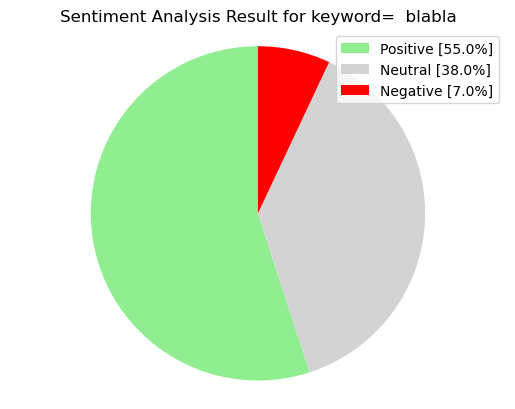

In [117]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['lightgreen', 'lightgray','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [78]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [79]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"RT @BoredApeYC: New merch coming Monday 3/28, ...","RT @BoredApeYC: New merch coming Monday 3/28, ..."
1,@agparadox @garyvee @elonmusk @mcuban @joeroga...,@agparadox @garyvee @elonmusk @mcuban @joeroga...
2,@machibigbrother @SpaceX @elonmusk @BoredApeYC...,@machibigbrother @SpaceX @elonmusk @BoredApeYC...
3,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...
5,🔥🔥We like @garyvee and #ElonMusk @elonmusk for...,🔥🔥We like @garyvee and #ElonMusk @elonmusk for...
7,RT @joganifty: My Skate Bored by @woundedpixel...,RT @joganifty: My Skate Bored by @woundedpixel...
9,TOP 5 VOLUME \nBoredApeYachtClub @BoredApeYC -...,TOP 5 VOLUME \nBoredApeYachtClub @BoredApeYC -...
10,RT @agparadox: Hey @garyvee @elonmusk @mcuban ...,RT @agparadox: Hey @garyvee @elonmusk @mcuban ...
11,@ApeCoinGiveaway @BoredApeYC https://t.co/Puuu...,@ApeCoinGiveaway @BoredApeYC https://t.co/Puuu...
12,#nft #nftgiveaway #nftcollectors #nftart #nfta...,#nft #nftgiveaway #nftcollectors #nftart #nfta...


In [80]:
tweet_list

,0,text
0,"RT @BoredApeYC: New merch coming Monday 3/28, ...","RT @BoredApeYC: New merch coming Monday 3/28, ..."
1,@agparadox @garyvee @elonmusk @mcuban @joeroga...,@agparadox @garyvee @elonmusk @mcuban @joeroga...
2,@machibigbrother @SpaceX @elonmusk @BoredApeYC...,@machibigbrother @SpaceX @elonmusk @BoredApeYC...
3,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...
5,🔥🔥We like @garyvee and #ElonMusk @elonmusk for...,🔥🔥We like @garyvee and #ElonMusk @elonmusk for...
7,RT @joganifty: My Skate Bored by @woundedpixel...,RT @joganifty: My Skate Bored by @woundedpixel...
9,TOP 5 VOLUME \nBoredApeYachtClub @BoredApeYC -...,TOP 5 VOLUME \nBoredApeYachtClub @BoredApeYC -...
10,RT @agparadox: Hey @garyvee @elonmusk @mcuban ...,RT @agparadox: Hey @garyvee @elonmusk @mcuban ...
11,@ApeCoinGiveaway @BoredApeYC https://t.co/Puuu...,@ApeCoinGiveaway @BoredApeYC https://t.co/Puuu...
12,#nft #nftgiveaway #nftcollectors #nftart #nfta...,#nft #nftgiveaway #nftcollectors #nftart #nfta...


In [81]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @BoredApeYC: New merch coming Monday 3/28, ...",new merch coming monday 3 28 12pm et this i...
1,@agparadox @garyvee @elonmusk @mcuban @joeroga...,it s coming oce...
2,@machibigbrother @SpaceX @elonmusk @BoredApeYC...,u can chance my life not elon musk
3,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...,giving away 1 of our nfts amp 3 333 ...
5,🔥🔥We like @garyvee and #ElonMusk @elonmusk for...,we like and elonmusk for a collaboratio...
7,RT @joganifty: My Skate Bored by @woundedpixel...,my skate bored by is in love it thanks a...
9,TOP 5 VOLUME \nBoredApeYachtClub @BoredApeYC -...,top 5 volume boredapeyachtclub 1469 01 et...
10,RT @agparadox: Hey @garyvee @elonmusk @mcuban ...,hey you can now
11,@ApeCoinGiveaway @BoredApeYC https://t.co/Puuu...,
12,#nft #nftgiveaway #nftcollectors #nftart #nfta...,nft nftgiveaway nftcollectors nftart nfta...


In [82]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @BoredApeYC: New merch coming Monday 3/28, ...",new merch coming monday 3 28 12pm et this i...,0.032468,0.298701,negative,0.091,0.909,0.000,-0.2263
1,@agparadox @garyvee @elonmusk @mcuban @joeroga...,it s coming oce...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,@machibigbrother @SpaceX @elonmusk @BoredApeYC...,u can chance my life not elon musk,0.000000,0.000000,positive,0.000,0.750,0.250,0.2500
3,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...,giving away 1 of our nfts amp 3 333 ...,0.000000,0.000000,positive,0.000,0.692,0.308,0.5994
5,🔥🔥We like @garyvee and #ElonMusk @elonmusk for...,we like and elonmusk for a collaboratio...,0.000000,0.000000,positive,0.000,0.667,0.333,0.3612
7,RT @joganifty: My Skate Bored by @woundedpixel...,my skate bored by is in love it thanks a...,0.066667,0.600000,positive,0.130,0.432,0.438,0.7184
9,TOP 5 VOLUME \nBoredApeYachtClub @BoredApeYC -...,top 5 volume boredapeyachtclub 1469 01 et...,0.500000,0.500000,positive,0.000,0.933,0.067,0.2023
10,RT @agparadox: Hey @garyvee @elonmusk @mcuban ...,hey you can now,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
11,@ApeCoinGiveaway @BoredApeYC https://t.co/Puuu...,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
12,#nft #nftgiveaway #nftcollectors #nftart #nfta...,nft nftgiveaway nftcollectors nftart nfta...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [83]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [84]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [85]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,26,49.06
positive,19,35.85
negative,8,15.09


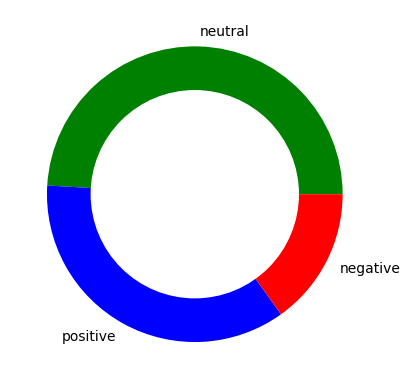

In [86]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [87]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


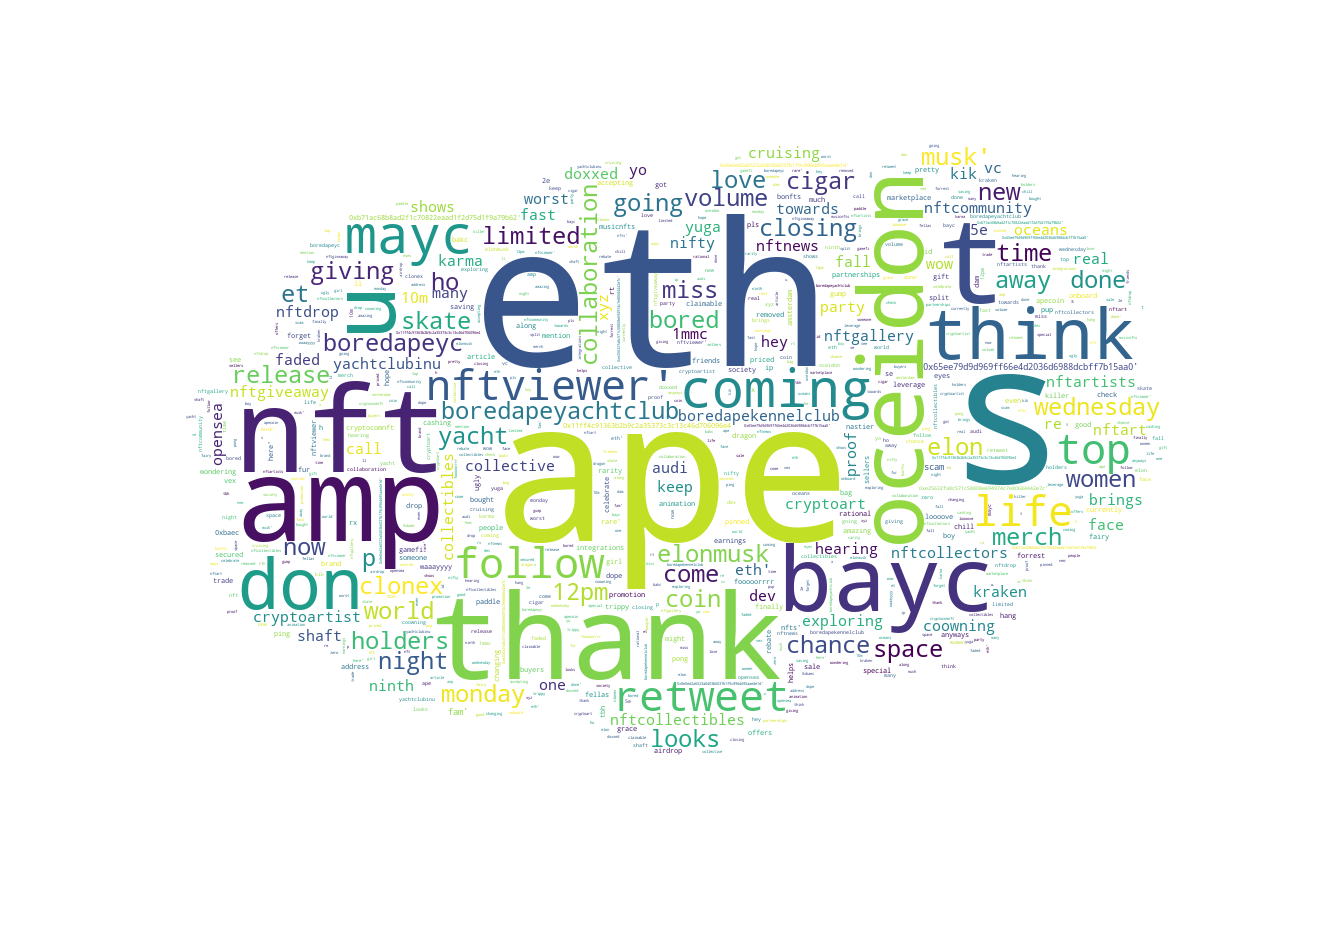

In [88]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


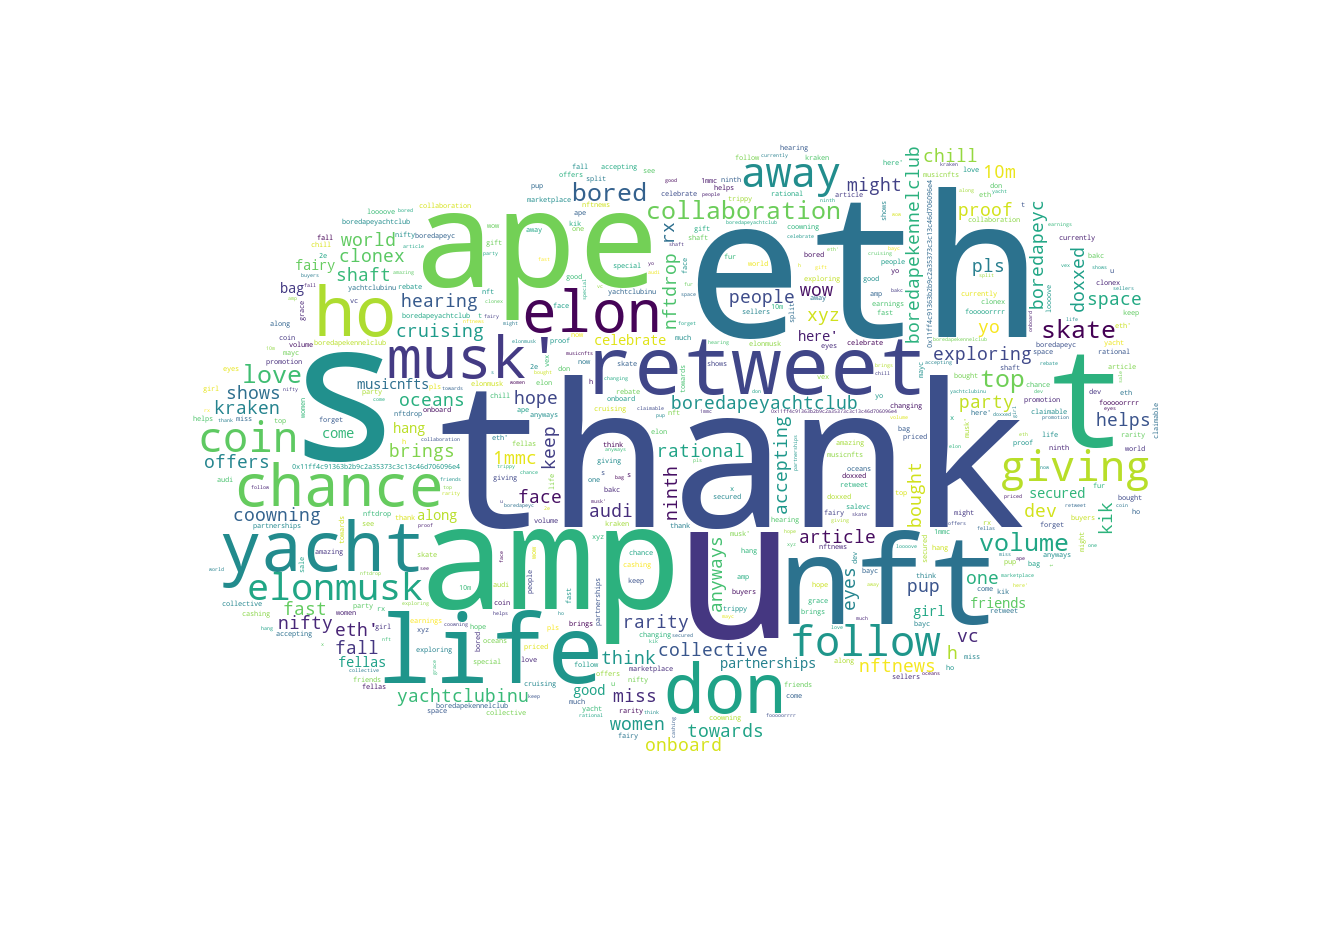

In [89]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


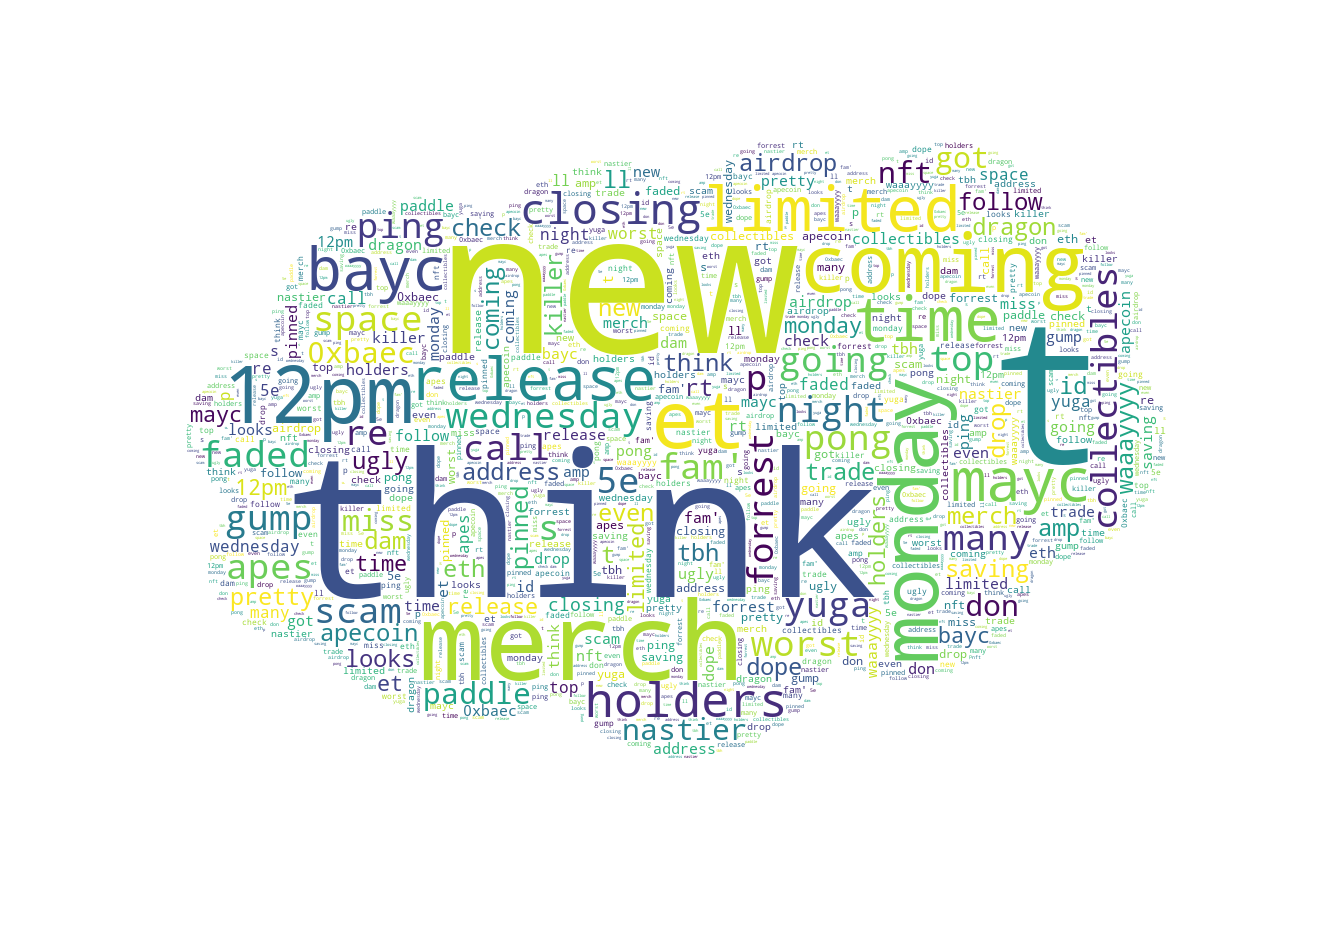

In [90]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


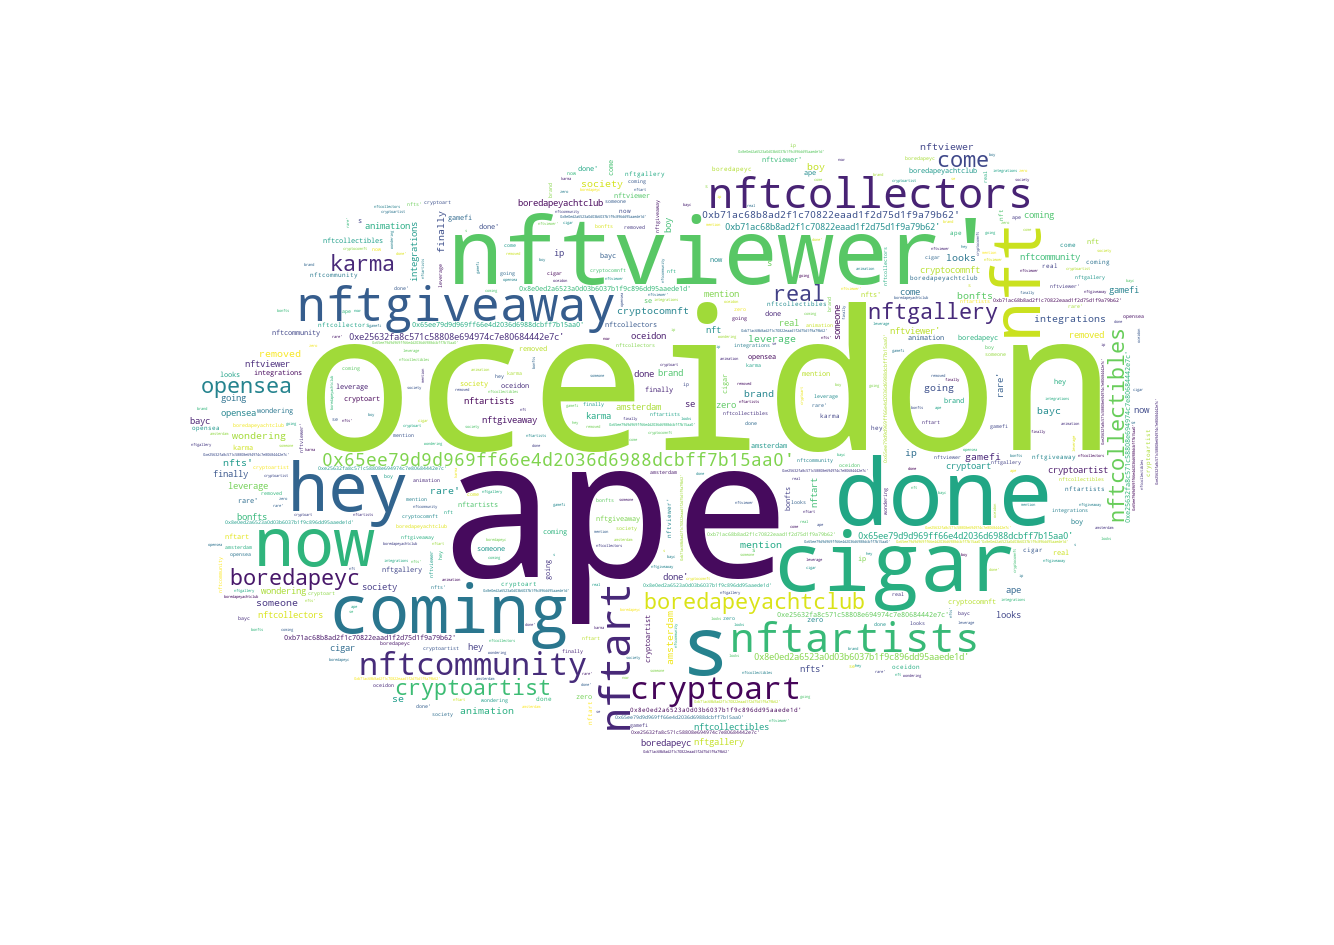

In [91]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [92]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [93]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,72.12
neutral,37.77
positive,90.21


In [94]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,13.12
neutral,3.15
positive,14.53


In [95]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [96]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [97]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [98]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [99]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [100]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,"RT @BoredApeYC: New merch coming Monday 3/28, ...",new merch coming monday 3 28 12pm et this i...,0.032468,0.298701,negative,0.091,0.909,0.000,-0.2263,125,23,new merch coming monday pm et this is a l...,"[, new, merch, coming, monday, pm, et, this, i...","[, new, merch, coming, monday, pm, et, limited...","[, new, merch, come, monday, pm, et, limit, ti..."
1,@agparadox @garyvee @elonmusk @mcuban @joeroga...,it s coming oce...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,61,5,it s coming oce...,"[, it, s, coming, oceidon, nftviewer]","[, coming, oceidon, nftviewer]","[, come, oceidon, nftviewer]"
2,@machibigbrother @SpaceX @elonmusk @BoredApeYC...,u can chance my life not elon musk,0.000000,0.000000,positive,0.000,0.750,0.250,0.2500,44,8,u can chance my life not elon musk,"[, u, can, chance, my, life, not, elon, musk]","[, u, chance, life, elon, musk]","[, u, chanc, life, elon, musk]"
3,RT @ApeCoinGiveaway: Giving away 1 of our @Bor...,giving away 1 of our nfts amp 3 333 ...,0.000000,0.000000,positive,0.000,0.692,0.308,0.5994,88,15,giving away of our nfts amp ape c...,"[, giving, away, of, our, nfts, amp, ape, coin...","[, giving, away, nfts, amp, ape, coin, like, r...","[, give, away, nft, amp, ape, coin, like, retw..."
5,🔥🔥We like @garyvee and #ElonMusk @elonmusk for...,we like and elonmusk for a collaboratio...,0.000000,0.000000,positive,0.000,0.667,0.333,0.3612,52,7,we like and elonmusk for a collaboratio...,"[, we, like, and, elonmusk, for, a, collaborat...","[, like, elonmusk, collaboration, ]","[, like, elonmusk, collabor, ]"


In [101]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

53 Number of reviews has 221 words


In [102]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/home/finlouarn/miniconda3/envs/avahack/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,accept,address,airdrop,along,amaz,amp,amsterdam,anim,anyway,...,xeedaadbbfcddaaed,xeeddffedddcbffbaa,xefacceceec,xffcbbcacccd,xyz,yacht,yachtclubinu,yo,yuga,zero
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
eth,7
ape,7
thank,6
nft,6
like,5
come,4
amp,4
oceidon,3
think,3
bayc,3


In [104]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [105]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('oceidon nftviewer', 3),
 ('bayc mayc', 2),
 ('don miss', 2),
 ('new merch', 1),
 ('merch coming', 1),
 ('coming monday', 1),
 ('monday 28', 1),
 ('28 12pm', 1),
 ('12pm et', 1),
 ('et limited', 1),
 ('limited time', 1),
 ('time release', 1),
 ('release bayc', 1),
 ('mayc holders', 1),
 ('holders closing', 1),
 ('closing wednesday', 1),
 ('wednesday night', 1),
 ('coming oceidon', 1),
 ('chance life', 1),
 ('life elon', 1)]

In [106]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('new merch coming', 1),
 ('merch coming monday', 1),
 ('coming monday 28', 1),
 ('monday 28 12pm', 1),
 ('28 12pm et', 1),
 ('12pm et limited', 1),
 ('et limited time', 1),
 ('limited time release', 1),
 ('time release bayc', 1),
 ('release bayc mayc', 1),
 ('bayc mayc holders', 1),
 ('mayc holders closing', 1),
 ('holders closing wednesday', 1),
 ('closing wednesday night', 1),
 ('coming oceidon nftviewer', 1),
 ('chance life elon', 1),
 ('life elon musk', 1),
 ('giving away nfts', 1),
 ('away nfts amp', 1),
 ('nfts amp 333', 1)]